#Task 4 - To Explore Decision Tree Algorithm

A Decision Tree classifier is created and visualized graphically for the given ‘Iris’ dataset. The purpose is to check which level of depth in the tree gives best accuracy and also if we feed any new data to this
classifier, it would be able to predict the right class accordingly.

Required packages imported

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Reading and Describing of the dataset

In [2]:
iris_data = pd.read_csv('iris.csv')
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_data = pd.read_csv('iris.csv', na_values=['NA'])

In [43]:
iris_data.shape

(150, 5)

In [4]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#Visualizations

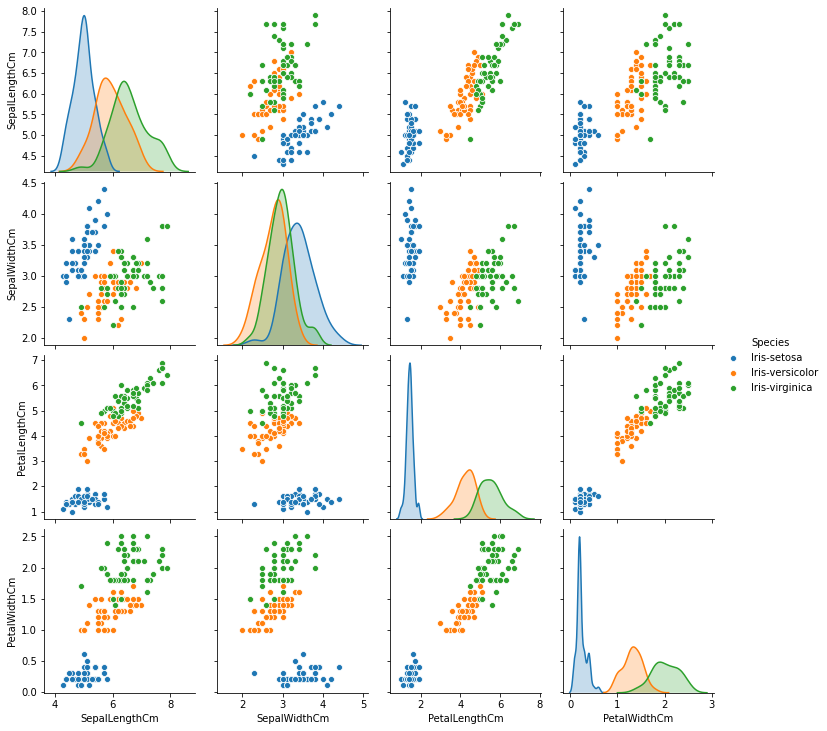

In [5]:
sns.pairplot(iris_data.dropna(), hue='Species')

A pairplot is used to identify the correlation between each features of the dataset.

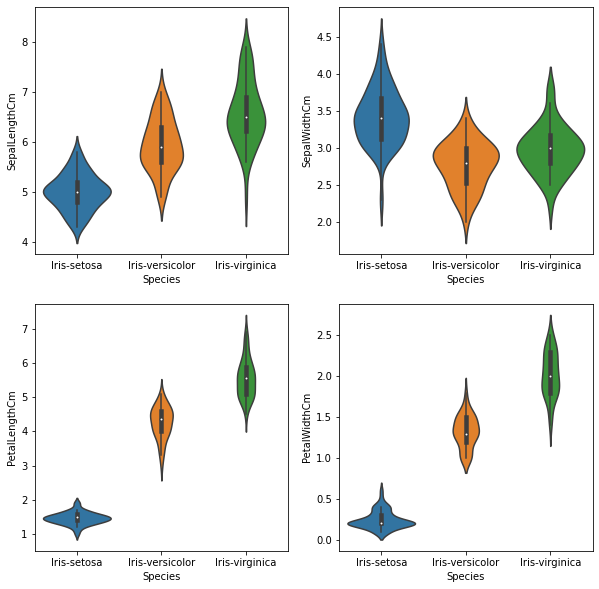

In [7]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data.columns):
    if column == 'Species':
        continue
    plt.subplot(2, 2, column_index + 1)
    sns.violinplot(x='Species', y=column, data=iris_data)

From the violin plot, we can see how the petal lenth, width and sepal lenght,width changes based upon the type of Flower.

#Training and Fitting the Dataset using Decision Tree Classifier

In [10]:
all_inputs = iris_data[['SepalLengthCm', 'SepalWidthCm',
                             'PetalLengthCm', 'PetalWidthCm']].values
all_labels = iris_data['Species'].values

In [11]:
from sklearn.model_selection import train_test_split

(training_inputs,testing_inputs,training_classes,testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

In [17]:
# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.9736842105263158

(array([ 12.,  23.,   0.,  89.,   0., 222., 323.,   0., 252.,  79.]),
 array([0.84210526, 0.85789474, 0.87368421, 0.88947368, 0.90526316,
        0.92105263, 0.93684211, 0.95263158, 0.96842105, 0.98421053,
        1.        ]),
 <a list of 10 Patch objects>)

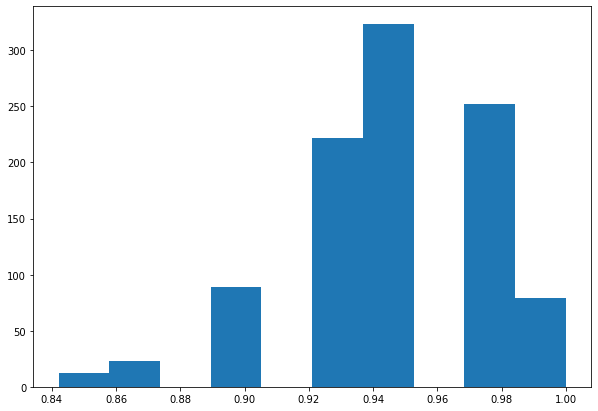

In [21]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,testing_inputs,training_classes,testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.figure(figsize=(10,7))
plt.hist(model_accuracies)


The above plot shows how the accuracy changes when the classifier ran for 1000 times.

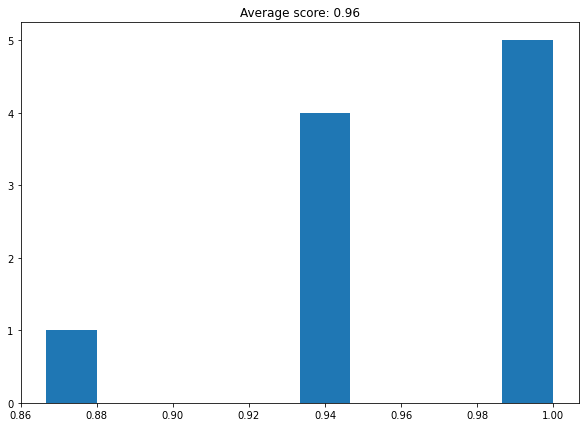

In [23]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()


cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.figure(figsize=(10,7))
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
plt.show()

Cross_val_score returns a list of the scores, which we can visualize to get a reasonable estimate of our classifier's performance

Text(0.5, 1.0, 'Average score: 0.6666666666666667')

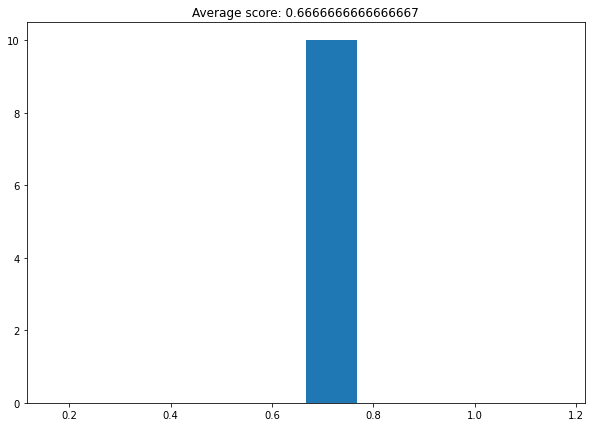

In [24]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.figure(figsize=(10,7))
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Thus using only 1 as the depth value for the decision tree reduces the accuracy

#Using GridCV method to try out different parameters for the classifier and checking which gives the best accuracy

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.96
Best parameters: {'max_depth': 3, 'max_features': 4}


Thus 96% is the best score obtained by analayzing all aspects of the decision tree classfier.

''

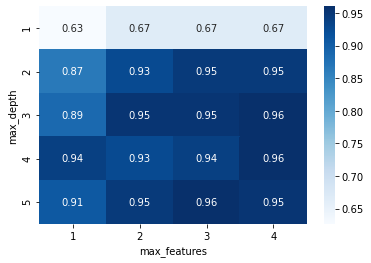

In [32]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sns.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')
;

Heatmap shows how the variance in depths and features for the dataset impacts the accuracy of the model.

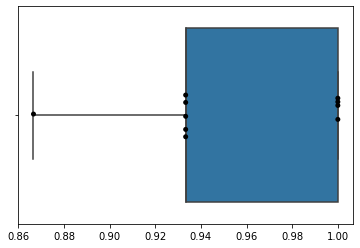

In [33]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)

sns.boxplot(dt_scores)
sns.stripplot(dt_scores, jitter=True, color='black')

Its a Boxplot of the cross-validation scores for the decision tree classifier

#Visualizing how the Decision Tree Classifier works using GraphViz

In [34]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [40]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier=DecisionTreeClassifier()
decision_tree_classifier.fit(training_inputs, training_classes)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


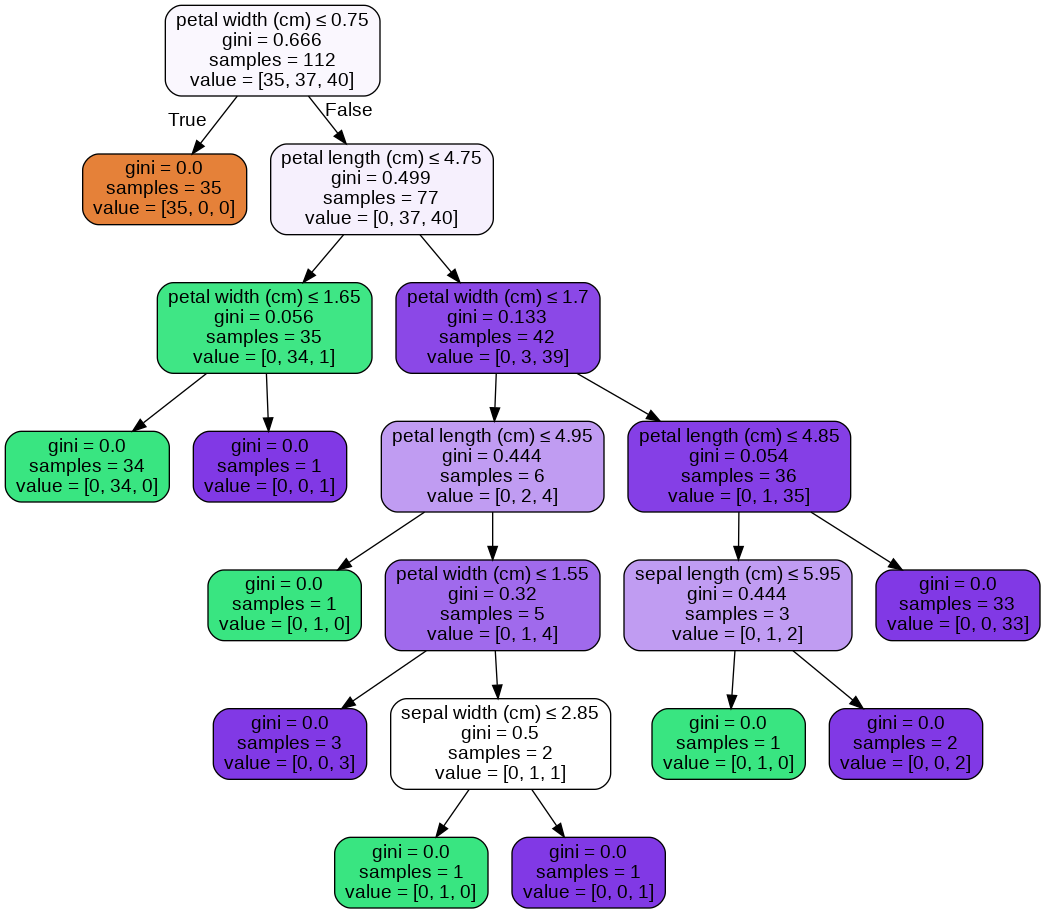

In [42]:
dot_data = StringIO()
export_graphviz(decision_tree_classifier, out_file=dot_data, 
                feature_names=['sepal length (cm)','sepal width (cm)','petal length (cm)', 'petal width (cm)'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

From the image, we can see how the decision tree classifier splits each node based upon the entropy value and thus obtaining a better accuracy.